In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
# import mne
# import os
# import numpy as np

# def concat_dataset(subjects, num_blocks):
#     raws = []
#     # base_path = "E:\Thesis\HybridSpeller\\simple_ssvep_v2\\record"
#     base_path = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record"

#     for subject in subjects:
#         for i in range(0,num_blocks):
#             path = os.path.join(base_path, subject, f"{subject}{i}.fif")
#             raw = mne.io.read_raw_fif(path, preload = True)
#             # raw.notch_filter([50,100], trans_bandwidth = 3)
#             # raw.filter(5,90, l_trans_bandwidth=2, h_trans_bandwidth=5, phase='zero-double')
#             # ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
#             # picks = mne.pick_channels(raw.ch_names, ['Pz','PO7', 'Oz', 'PO8'], ordered=True)
#             # raw.pick_channels(['Pz','PO7', 'Oz', 'PO8','STIM MARKERS'], ordered=True)
#             # new_data = raw.get_data()[:,10*250:-10*250]
#             # raw_new = mne.io.RawArray(new_data, raw.info)
#             # raw_data = raw.get_data()
#             # print(raw_data.shape)
#             raws.append(raw)
#             # raws.append(raw_new)
#     raw = mne.concatenate_raws(raws)
#     montage = mne.channels.make_standard_montage('standard_1020')
#     raw.set_montage(montage)
#     print(raw.info['ch_names'])
#     print(raw.info['sfreq'])
#     return raw

In [28]:
import mne
import os
import numpy as np

def concat_dataset(subjects, num_blocks):
    data_list = []
    # base_path = "E:\Thesis\HybridSpeller\\simple_ssvep_v2\\record"
    base_path = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record"

    for subject in subjects:
        for i in range(0,num_blocks):
            path = os.path.join(base_path, subject, f"{subject}{i}.fif")
            raw = mne.io.read_raw_fif(path, preload = True)
            raw.notch_filter([50,100], trans_bandwidth = 3)
            # raw.filter(5,90, l_trans_bandwidth=2, h_trans_bandwidth=5, phase='zero-double')
            # ['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
            # picks = mne.pick_channels(raw.ch_names, ['Pz','PO7', 'Oz', 'PO8'], ordered=True)
            # raw.pick_channels(['Pz','PO7', 'Oz', 'PO8','STIM MARKERS'], ordered=True)
            new_data = raw.get_data()[:,5*250:-5*250]
            raw_new = mne.io.RawArray(new_data, raw.info)
            montage = mne.channels.make_standard_montage('standard_1020')
            raw_new.set_montage(montage)
            events = mne.find_events(raw_new)
            epochs = mne.Epochs(raw=raw_new,events=events, baseline=None, tmin=0, tmax=3.696, reject=None, reject_by_annotation=False)
            data = epochs.get_data()
            print(data.shape)
            data_list.append(data)
            # raws.append(raw_new)
    epoch_data = np.stack(data_list, axis=-1)
    return epoch_data

Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\wang_experiment\record\sunsun_20230331_online\sunsun_20230331_online.fif...
    Range : 0 ... 119868 =      0.000 ...   479.472 secs
Ready.
Reading 0 ... 119868  =      0.000 ...   479.472 secs...
Creating RawArray with float64 data, n_channels=9, n_times=114869
    Range : 0 ... 114868 =      0.000 ...   459.472 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 1.50 Hz
- Upper transition bandwidth: 1.50 Hz
- Filter length: 551 samples (2.204 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 77 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


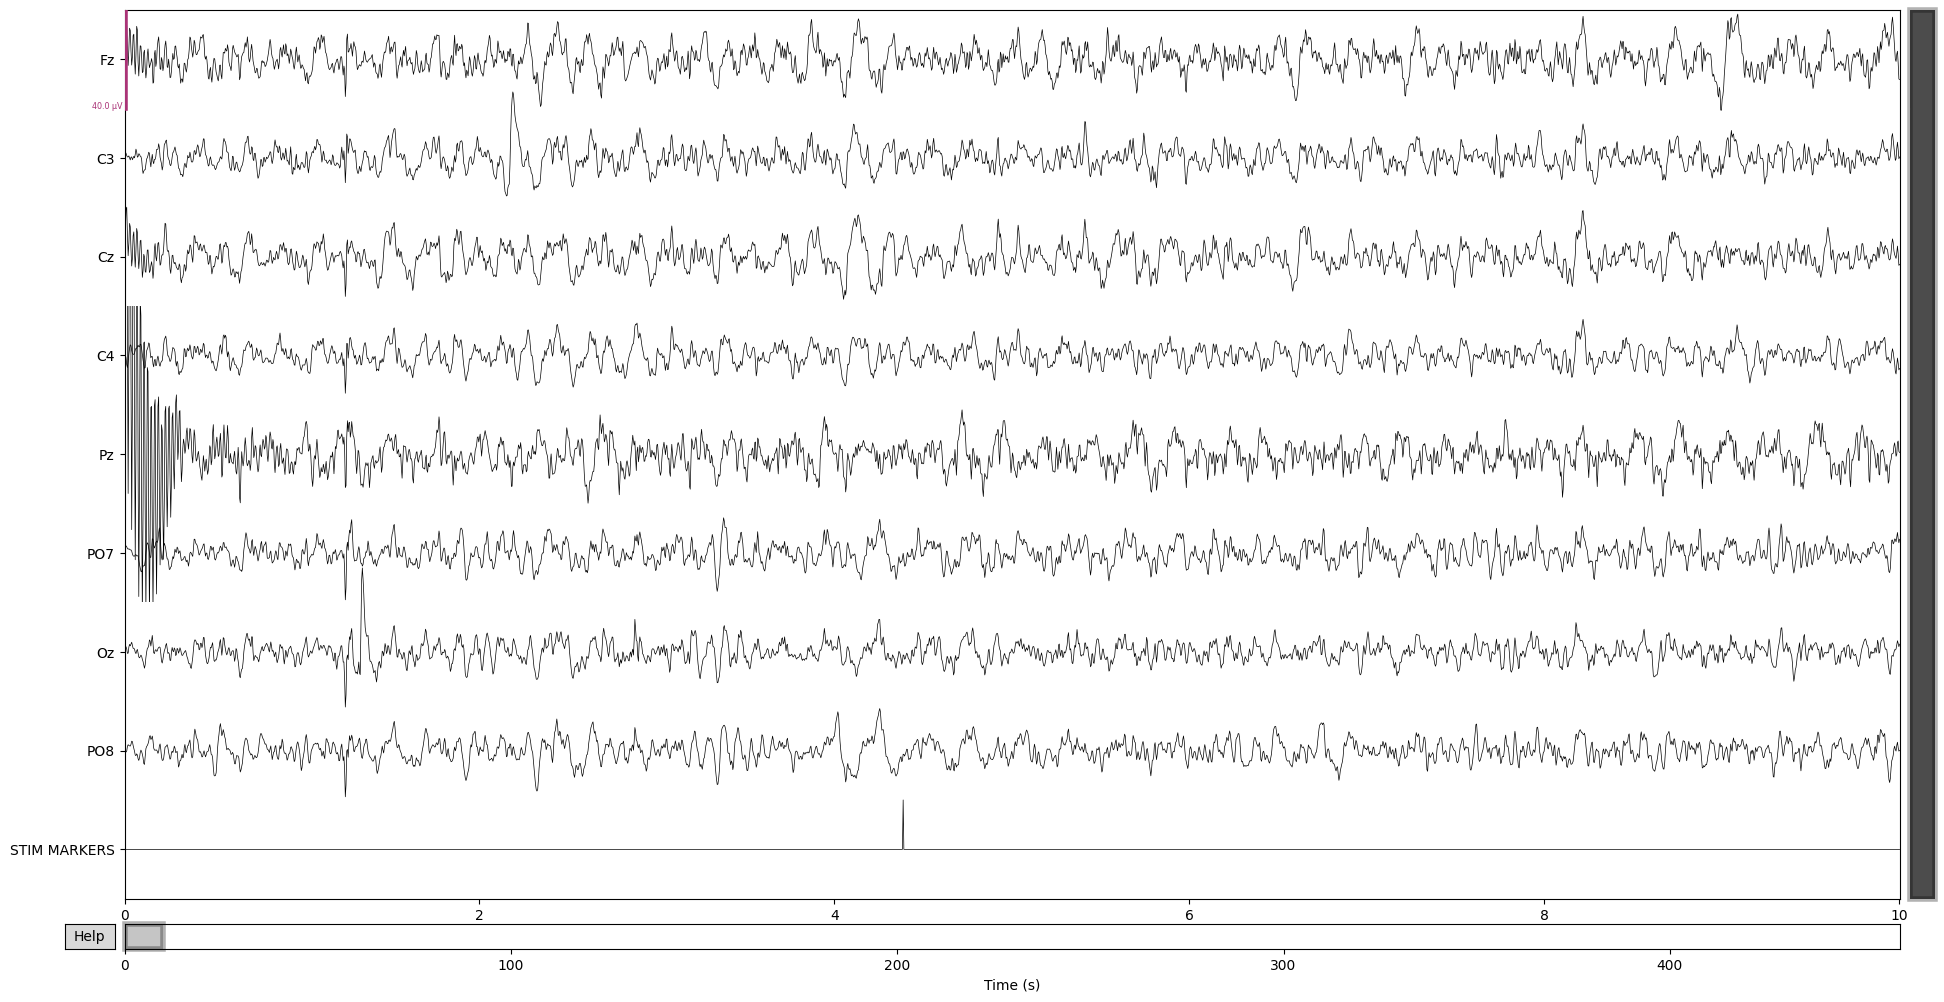

In [29]:
import matplotlib.pyplot as plt

fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\wang_experiment\record\sunsun_20230331_online\sunsun_20230331_online.fif"
raw =  mne.io.read_raw_fif(fname,  preload = True)
new_data = raw.get_data()[:,10*250:-10*250]
raw_new = mne.io.RawArray(new_data, raw.info)
raw_new.notch_filter([50,100], trans_bandwidth = 3)
raw_new.filter(4,77)
raw_new.plot()
plt.show()

In [30]:
# import scipy.io

# subjects = ['sunsun_20230319']
# epoch_data = concat_dataset(subjects, 5)
# fname = "record\sunsun_9_flicker\sunsun_9_flicker4.fif"
# raw =  mne.io.read_raw_fif(fname)
# new_data = raw.get_data()[:,10*250:-10*250]
# new_data = raw.get_data()
# raw = mne.io.RawArray(new_data, raw.info)
# raw.notch_filter([50,100], trans_bandwidth = 3)
# raw = raw.filter(4,77)
# events = mne.find_events(raw)
# epochs = mne.Epochs(raw=raw,events=events, baseline=None, tmin=0, tmax=3.696, reject=None, reject_by_annotation=False)
# epoch_data = epochs.get_data()
# print(epoch_data.shape)
# epoch_data = epoch_data.reshape(9,9,5,925)
# print(epoch_data.shape)

In [31]:
events = mne.find_events(raw_new)
epochs = mne.Epochs(raw=raw_new,events=events, baseline=None, tmin=0, tmax=3.7, reject=None, reject_by_annotation=False)

45 events found
Event IDs: [1 2 3 4 5 6 7 8 9]
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated


In [32]:
epochs.get_data().shape

Using data from preloaded Raw for 45 events and 926 original time points ...
0 bad epochs dropped


(45, 9, 926)

In [33]:
raw.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fz, C3, Cz, C4, Pz, PO7, Oz, PO8, STIM MARKERS
 chs: 8 EEG, 1 Stimulus
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 9
 projs: []
 sfreq: 250.0 Hz
>

In [34]:
# subjects = ['sunsun_20230319_test']
# raw_test = concat_dataset(subjects, 5)
# # fname = "record\sunsun_9_flicker\sunsun_9_flicker4.fif"
# # raw =  mne.io.read_raw_fif(fname)
# # new_test_data = raw.get_data()[:,10*250:-10*250]
# # new_test_data = raw.get_data()
# # raw_test = mne.io.RawArray(new_test_data, raw.info)
# # raw_test.notch_filter([50,100], trans_bandwidth = 3)
# # raw_test = raw_test.filter(4,77)
# events_test = mne.find_events(raw_test)
# epochs_test = mne.Epochs(raw=raw_test,events=events_test, baseline=None, tmin=0, tmax=2, reject=None, reject_by_annotation=False)
# # epochs_test = mne.Epochs(raw=raw_test,events=events_test, baseline=(0,0.1), tmin=0, tmax=3, reject=None, reject_by_annotation=False)
# raw_test.compute_psd().plot()
# raw_test.plot()

In [35]:
# """
# Created on Fri Nov  1 10:16:21 2019

# @author: ALU
# """
# import warnings
# import scipy.signal
# import numpy as np

# def filterbank(eeg, fs, idx_fb):
#     if idx_fb == None:
#         warnings.warn('stats:filterbank:MissingInput '\
#                           +'Missing filter index. Default value (idx_fb = 0) will be used.')
#         idx_fb = 0
#     elif (idx_fb < 0 or 9 < idx_fb):
#         raise ValueError('stats:filterbank:InvalidInput '\
#                           +'The number of sub-bands must be 0 <= idx_fb <= 9.')
            
#     if (len(eeg.shape)==2):
#         num_chans = eeg.shape[0]
#         num_trials = 1
#     else:
#         _, num_chans, num_trials = eeg.shape
    
#     # Nyquist Frequency = Fs/2N
#     Nq = fs/2
    
#     passband = [6, 14, 22, 30, 38, 46, 54, 62, 70, 78]
#     stopband = [4, 10, 16, 24, 32, 40, 48, 56, 64, 72]
#     Wp = [passband[idx_fb]/Nq, 90/Nq]
    
#     #print("Wp: ", Wp)
#     Ws = [stopband[idx_fb]/Nq, 100/Nq]
    
#     #print("Ws: ", Ws)
#     [N, Wn] = scipy.signal.cheb1ord(Wp, Ws, 3, 40) # band pass filter StopBand=[Ws(1)~Ws(2)] PassBand=[Wp(1)~Wp(2)]
#     [B, A] = scipy.signal.cheby1(N, 0.5, Wn, 'bandpass') # Wn passband edge frequency
    
#     y = np.zeros(eeg.shape)
    
#     if (num_trials == 1):
#         for ch_i in range(num_chans):
#             #apply zero-phase filter
#             y[ch_i, :] = scipy.signal.filtfilt(B, A, eeg[ch_i, :], method='gust')  
        
#     else:
#         for trial_i in range(num_trials):
#             for ch_i in range(num_chans):
#                 y[:, ch_i, trial_i] = scipy.signal.filtfilt(B, A, eeg[:, ch_i, trial_i], method='gust')
                
#     return y

In [36]:
# import numpy as np
# import scipy.linalg as linalg

# from sklearn.base import BaseEstimator, ClassifierMixin
# from pyriemann.estimation import Covariances
# from sklearn.utils.validation import check_is_fitted

# from pyriemann.utils.mean import mean_covariance



# class TRCA(BaseEstimator, ClassifierMixin):
#     """
#     Parameters
#     ----------

#     sfreq : float
#         Sampling frequency of the data to be analyzed.

#      peaks : list of len (n_classes)
#         Frequencies corresponding to the SSVEP components. These are
#         necessary to construct the filterbank.

#     peaks : list of len (n_classes)
#         Frequencies corresponding to the SSVEP components. These are
#         necessary to design the filterbank bands.

#     n_fbands : int, default=5
#         Number of sub-bands considered for filterbank analysis.

#     downsample: int, default=1
#         Factor by which downsample the data. A downsample value of N will result
#         on a sampling frequency of (sfreq // N) by taking one sample every N of
#         the original data. In the original TRCA paper [1] data are at 250Hz.

#     is_ensemble: bool, default=False
#         If True, predict on new data using the Ensemble-TRCA method described
#         in [1].

#     method: str, default='original'
#         'original' computes euclidean mean for S as in the original paper [1].
#         'riemann' variation computes geodesic mean instead. This geodesic
#         mean is more robust to outlier but negatively impacted by ill-conditioned
#         matrices (when only few samples are availble for training for instance).
#         'riemann' variation is then usefull when lots of noisy training data are
#         available.

#     regul : str
#         For both methods, regularization to use for covariance matrices estimations.
#         Consider 'schaefer', 'lwf', 'oas' or 'scm' for no regularization.
#         In the original implementation from TRCA paper [1], no regularization
#         is used. So method='original' and regul='scm' is similar to original
#         implementation.


#     Attributes
#     ----------

#     fb_coefs : list of len (n_fb)
#         Alpha coefficients for the fusion of the filterbank sub-bands.

#     classes_ : ndarray of shape (n_class,)
#         Array with the class labels extracted at fit time.

#     n_class : int
#         Number of unique labels/classes.

#     templates_ : ndarray of shape (n_class, n_bands, n_channels, n_samples)
#         Template data obtained by averaging all training trials for a given
#         class. Each class templates is divided in n_fbands sub-bands extracted
#         from the filterbank approach.

#     weights_ : ndarray of shape (n_fbands, n_class, n_channels)
#         Weight coefficients for the different electrodes which are used
#         as spatial filters for the data.

#     x_train_ : ndarray of shape ((n_trials, self.n_class, n_samples)
#         Calibration data filtered with the first filter of filterbank and
#         with spatial filter. Only used to compute TrustScore.
#         See:  https://arxiv.org/abs/1805.11783

#     """

#     def __init__(
#         self,
#         sfreq,
#         peaks,
#         n_fbands=5,
#         downsample=1,
#         is_ensemble=True,
#         method="original",
#         regul="schaefer",

#     ):
#         self.peaks = peaks
#         self.n_fbands = n_fbands
#         self.downsample = downsample
#         self.sfreq = sfreq / self.downsample
#         self.peaks = peaks
#         self.is_ensemble = is_ensemble
#         self.fb_coefs = [(x + 1) ** (-1.25) + 0.25 for x in range(self.n_fbands)]

#         self.regul = regul
#         self.method = method

#     def _compute_trca(self, data):
#         """
#         Computation of TRCA spatial filters.

#         Parameters
#         ----------

#         data: np.array, shape (trials, channels, samples)
#             Training data

#         Returns
#         -------

#         W: np.array, shape (channels)
#             Weight coefficients for electrodes which can be used as
#             a spatial filter.
#         """

#         # Check if X is a single trial (test data) or not
#         if data.ndim == 2:
#             data = data[np.newaxis, ...]

#         # Get data shape
#         n_trials, n_channels, n_samples = data.shape

#         X = np.concatenate((data, data), axis=1)

#         if self.method == "original":
#             # Initialize S matrix
#             S = np.zeros((n_channels, n_channels))

#             # Estimate covariance between every trial and the rest of the trials (excluding itself)
#             for trial_i in range(n_trials - 1):
#                 x1 = np.squeeze(data[trial_i, :, :])

#                 # Mean centering for the selected trial
#                 x1 -= np.mean(x1, 0)

#                 # Select a second trial that is different
#                 for trial_j in range(trial_i + 1, n_trials):
#                     x2 = np.squeeze(data[trial_j, :, :])

#                     # Mean centering for the selected trial
#                     x2 -= np.mean(x2, 0)

#                     # # Put the two trials together
#                     X = np.concatenate((x1, x2))

#                     if n_channels == 1:
#                         X = X.reshape((n_channels, len(X)))

#                     # Regularized covariance estimate
#                     cov = Covariances(estimator=self.regul).fit_transform(
#                         X[np.newaxis, ...]
#                     )
#                     cov = np.squeeze(cov)

#                     # Compute empirical covariance betwwen the two selected trials and sum it
#                     if n_channels > 1:
#                         S = (
#                             S
#                             + cov[:n_channels, n_channels:]
#                             + cov[n_channels:, :n_channels]
#                         )

#                     else:
#                         S = S + cov + cov

#             # Concatenate all the trials
#             UX = np.zeros((n_channels, n_samples * n_trials))

#             for trial_n in range(n_trials):
#                 UX[:, trial_n * n_samples : (trial_n + 1) * n_samples] = data[
#                     trial_n, :, :
#                 ]

#             # Mean centering
#             UX -= np.mean(UX, 1)[:, None]
#             cov = Covariances(estimator=self.regul).fit_transform(UX[np.newaxis, ...])
#             Q = np.squeeze(cov)

#         elif self.method == "riemann" or self.method == 'logeuclid':
#             # Concatenate all the trials
#             UX = np.zeros((n_channels, n_samples * n_trials))

#             for trial_n in range(n_trials):
#                 UX[:, trial_n * n_samples : (trial_n + 1) * n_samples] = data[
#                     trial_n, :, :
#                 ]

#             # Mean centering
#             UX -= np.mean(UX, 1)[:, None]

#             # Compute empirical variance of all data (to be bounded)
#             cov = Covariances(estimator=self.regul).fit_transform(UX[np.newaxis, ...])
#             Q = np.squeeze(cov)

#             cov = Covariances(estimator=self.regul).fit_transform(X)
#             S = cov[:, :n_channels, n_channels:] + cov[:, n_channels:, :n_channels]
#             try:
#                 S = mean_covariance(S, metric=self.method)
#             except:
#                 S = (
#                     cov[:, :n_channels, n_channels:]
#                     + cov[:, n_channels:, :n_channels]
#                     + 1e-10 * np.identity(n_channels)
#                 )  # Add more regul
#                 try:
#                     S = mean_covariance(S, metric=self.method)
#                 except:
#                     S = (
#                         cov[:, :n_channels, n_channels:]
#                         + cov[:, n_channels:, :n_channels]
#                         + 1e-8 * np.identity(n_channels)
#                     )
#                     S = mean_covariance(S, metric=self.method)

#         else:
#             raise ValueError("Method should be either 'original' or 'riemann'.")

#         # Compute eigenvalues and vectors
#         lambdas, W = linalg.eig(S, Q, left=True, right=False)

#         # Sort eigenvectors by eigenvalue
#         arr1inds = lambdas.argsort()
#         W = W[:, arr1inds[::-1]]

#         return W[:, 0], W

#     def fit(self, X, y):
#         """
#         Extract spatial filters and templates from the given calibration data.

#         Parameters
#         ----------

#         X : ndarray of shape (n_trials, n_channels, n_samples)
#             Training data. Trials are grouped by class, divided in n_fbands bands by
#             the filterbank approach and then used to calculate weight vectors and
#             templates for each class and band.

#         y : ndarray of shape (n_trials,)
#             Label vector in respect to X.

#         Returns
#         -------

#         self: TRCA object
#             Instance of classifier.
#         """
#         # Downsample data
#         X = X[:, :, :: self.downsample]

#         # Get shape of X and labels
#         n_trials, n_channels, n_samples = X.shape

#         self.classes_ = np.unique(y)
#         self.n_class = len(self.classes_)

#         # Initialize the final arrays
#         self.templates_ = np.zeros((self.n_class, self.n_fbands, n_channels, n_samples))
#         self.weights_ = np.zeros((self.n_fbands, self.n_class, n_channels))
#         if self.trustscore:
#             self.x_train_ = np.zeros((n_trials, self.n_class, n_samples))
#             self.y_train_ = np.array(y)
#         for class_idx in self.classes_:
#             cal_data = X[y == class_idx]  # Select data with a specific label
#             # Filterbank approach
#             for band_n in range(self.n_fbands):
#                 # Filter the data and compute TRCA
#                 filter_data = filterbank(cal_data, self.sfreq, band_n, self.peaks)
#                 w_best, _ = self._compute_trca(filter_data)
#                 if self.trustscore and band_n == 0:
#                     for trial_n, filt_data in enumerate(filter_data):
#                         self.x_train_[trial_n, class_idx, :] = np.dot(
#                             filt_data.T, w_best
#                         )

#                 # Get template by averaging trials and take the best filter for this band
#                 self.templates_[class_idx, band_n, :, :] = np.mean(filter_data, axis=0)
#                 self.weights_[band_n, class_idx, :] = w_best

#         return self

#     def predict(self, X):
#         """
#         Make predictions on unseen data. The new data observation X will be filtered
#         with weights previously extracted and compared to the templates to assess
#         similarity with each of them and select a class based on the maximal value.

#         Parameters
#         ----------

#         X : ndarray of shape (n_trials, n_channels, n_samples)
#             Testing data. This will be divided in self.n_fbands using the filter- bank approach,
#             then it will be transformed by the different spatial filters and compared to the
#             previously fit templates according to the selected method for analysis (ensemble or
#             not). Finally, correlation scores for all sub-bands of each class will be combined,
#             resulting on a single correlation score per class, from which the maximal one is
#             identified as the predicted class of the data.

#         Returns
#         -------

#         y_pred : ndarray of shape (n_trials,)
#             Prediction vector in respect to X.
#         """

#         # Check is fit had been called
#         check_is_fitted(self)

#         # Check if X is a single trial or not
#         if X.ndim == 2:
#             X = X[np.newaxis, ...]

#         # Downsample data
#         X = X[:, :, :: self.downsample]

#         # Get test data shape
#         n_trials, _, _ = X.shape

#         # Initialize pred array
#         y_pred = []

#         for trial_n in range(n_trials):
#             # Pick trial
#             test_data = X[trial_n, :, :]

#             # Initialize correlations array
#             corr_array = np.zeros((self.n_fbands, self.n_class))

#             # Filter the data in the corresponding band
#             for band_n in range(self.n_fbands):
#                 filter_data = filterbank(test_data, self.sfreq, band_n, self.peaks)

#                 # Compute correlation with all the templates and bands
#                 for class_idx in range(self.n_class):
#                     # Get the corresponding template
#                     template = np.squeeze(self.templates_[class_idx, band_n, :, :])

#                     if self.is_ensemble:
#                         w = np.squeeze(
#                             self.weights_[band_n, :, :]
#                         ).T  # (n_class, n_channel)
#                     else:
#                         w = np.squeeze(
#                             self.weights_[band_n, class_idx, :]
#                         ).T  # (n_channel,)

#                     # Compute 2D correlation of spatially filtered testdata with ref
#                     r = np.corrcoef(
#                         np.dot(filter_data.T, w).flatten(),
#                         np.dot(template.T, w).flatten(),
#                     )
#                     corr_array[band_n, class_idx] = r[0, 1]

#             # Fusion for the filterbank analysis
#             rho = np.dot(self.fb_coefs, corr_array)

#             # Select the maximal value and append to preddictions
#             tau = np.argmax(rho)
#             y_pred.append(tau)

#         return y_pred

In [37]:
# """TRCA utils."""
# import numpy as np

# from scipy.signal import filtfilt, cheb1ord, cheby1
# from scipy import stats


# def round_half_up(num, decimals=0):
#     """Round half up round the last decimal of the number.
#     The rules are:
#     from 0 to 4 rounds down
#     from 5 to 9 rounds up
#     Parameters
#     ----------
#     num : float
#         Number to round
#     decimals : number of decimals
#     Returns
#     -------
#     num rounded
#     """
#     multiplier = 10 ** decimals
#     return int(np.floor(num * multiplier + 0.5) / multiplier)


# def normfit(data, ci=0.95):
#     """Compute the mean, std and confidence interval for them.
#     Parameters
#     ----------
#     data : array, shape=()
#         Input data.
#     ci : float
#         Confidence interval (default=0.95).
#     Returns
#     -------
#     m : float
#         Mean.
#     sigma : float
#         Standard deviation
#     [m - h, m + h] : list
#         Confidence interval of the mean.
#     [sigmaCI_lower, sigmaCI_upper] : list
#         Confidence interval of the std.
#     """
#     arr = 1.0 * np.array(data)
#     num = len(arr)
#     avg, std_err = np.mean(arr), stats.sem(arr)
#     h_int = std_err * stats.t.ppf((1 + ci) / 2., num - 1)
#     var = np.var(data, ddof=1)
#     var_ci_upper = var * (num - 1) / stats.chi2.ppf((1 - ci) / 2, num - 1)
#     var_ci_lower = var * (num - 1) / stats.chi2.ppf(1 - (1 - ci) / 2, num - 1)
#     sigma = np.sqrt(var)
#     sigma_ci_lower = np.sqrt(var_ci_lower)
#     sigma_ci_upper = np.sqrt(var_ci_upper)

#     return avg, sigma, [avg - h_int, avg +
#                         h_int], [sigma_ci_lower, sigma_ci_upper]


# def itr(n, p, t):
#     """Compute information transfer rate (ITR).
#     Definition in [1]_.
#     Parameters
#     ----------
#     n : int
#         Number of targets.
#     p : float
#         Target identification accuracy (0 <= p <= 1).
#     t : float
#         Average time for a selection (s).
#     Returns
#     -------
#     itr : float
#         Information transfer rate [bits/min]
#     References
#     ----------
#     .. [1] M. Cheng, X. Gao, S. Gao, and D. Xu,
#         "Design and Implementation of a Brain-Computer Interface With High
#         Transfer Rates", IEEE Trans. Biomed. Eng. 49, 1181-1186, 2002.
#     """
#     itr = 0

#     if (p < 0 or 1 < p):
#         raise ValueError('Accuracy need to be between 0 and 1.')
#     elif (p < 1 / n):
#         itr = 0
#         raise ValueError('ITR might be incorrect because accuracy < chance')
#     elif (p == 1):
#         itr = np.log2(n) * 60 / t
#     else:
#         itr = (np.log2(n) + p * np.log2(p) + (1 - p) *
#                np.log2((1 - p) / (n - 1))) * 60 / t

#     return itr


# def bandpass(eeg, sfreq, Wp, Ws):
#     """Filter bank design for decomposing EEG data into sub-band components.
#     Parameters
#     ----------
#     eeg : np.array, shape=(n_samples, n_chans[, n_trials])
#         Training data.
#     sfreq : int
#         Sampling frequency of the data.
#     Wp : 2-tuple
#         Passband for Chebyshev filter.
#     Ws : 2-tuple
#         Stopband for Chebyshev filter.
#     Returns
#     -------
#     y: np.array, shape=(n_trials, n_chans, n_samples)
#         Sub-band components decomposed by a filter bank.
#     See Also
#     --------
#     scipy.signal.cheb1ord :
#         Chebyshev type I filter order selection.
#     """
#     # Chebyshev type I filter order selection.
#     N, Wn = cheb1ord(Wp, Ws, 3, 40, fs=sfreq)

#     # Chebyshev type I filter design
#     B, A = cheby1(N, 0.5, Wn, btype="bandpass", fs=sfreq)

#     # the arguments 'axis=0, padtype='odd', padlen=3*(max(len(B),len(A))-1)'
#     # correspond to Matlab filtfilt : https://dsp.stackexchange.com/a/47945
#     y = filtfilt(B, A, eeg, axis=0, padtype='odd',
#                  padlen=3 * (max(len(B), len(A)) - 1))
#     return y


# def schaefer_strimmer_cov(X):
#     r"""Schaefer-Strimmer covariance estimator.
#     Shrinkage estimator described in [1]_:
#     .. math:: \hat{\Sigma} = (1 - \gamma)\Sigma_{scm} + \gamma T
#     where :math:`T` is the diagonal target matrix:
#     .. math:: T_{i,j} = \{ \Sigma_{scm}^{ii} \text{if} i = j,
#          0 \text{otherwise} \}
#     Note that the optimal :math:`\gamma` is estimated by the authors' method.
#     Parameters
#     ----------
#     X: array, shape=(n_chans, n_samples)
#         Signal matrix.
#     Returns
#     -------
#     cov: array, shape=(n_chans, n_chans)
#         Schaefer-Strimmer shrinkage covariance matrix.
#     References
#     ----------
#     .. [1] Schafer, J., and K. Strimmer. 2005. A shrinkage approach to
#        large-scale covariance estimation and implications for functional
#        genomics. Statist. Appl. Genet. Mol. Biol. 4:32.
#     """
#     ns = X.shape[1]
#     C_scm = np.cov(X, ddof=0)
#     X_c = X - np.tile(X.mean(axis=1), [ns, 1]).T

#     # Compute optimal gamma, the weigthing between SCM and srinkage estimator
#     R = ns / (ns - 1.0) * np.corrcoef(X)
#     var_R = (X_c ** 2).dot((X_c ** 2).T) - 2 * C_scm * X_c.dot(X_c.T)
#     var_R += ns * C_scm ** 2

#     var_R = ns / ((ns - 1) ** 3 * np.outer(X.var(1), X.var(1))) * var_R
#     R -= np.diag(np.diag(R))
#     var_R -= np.diag(np.diag(var_R))
#     gamma = max(0, min(1, var_R.sum() / (R ** 2).sum()))

#     cov = (1. - gamma) * (ns / (ns - 1.)) * C_scm
#     cov += gamma * (ns / (ns - 1.)) * np.diag(np.diag(C_scm))

#     return cov


In [38]:
# def _check_data(X):
#     """Check data is numpy array and has the proper dimensions."""
#     if not isinstance(X, (np.ndarray, list)):
#         raise AttributeError('data should be a list or a numpy array')

#     dtype = np.complex128 if np.any(np.iscomplex(X)) else np.float64
#     X = np.asanyarray(X, dtype=dtype)
#     if X.ndim > 3:
#         raise ValueError('Data must be 3D at most')

#     return X

# def theshapeof(X):
#     """Return the shape of X."""
#     X = _check_data(X)
#     # if not isinstance(X, np.ndarray):
#     #     raise AttributeError('X must be a numpy array')

#     if X.ndim == 3:
#         return X.shape[0], X.shape[1], X.shape[2]
#     elif X.ndim == 2:
#         return X.shape[0], X.shape[1], 1
#     elif X.ndim == 1:
#         return X.shape[0], 1, 1
#     else:
#         raise ValueError("Array contains more than 3 dimensions")

In [39]:
# class TRCA:
#     """Task-Related Component Analysis (TRCA).
#     Parameters
#     ----------
#     sfreq : float
#         Sampling rate.
#     filterbank : list[[2-tuple, 2-tuple]]
#         Filterbank frequencies. Each list element is itself a list of passband
#         `Wp` and stopband `Ws` edges frequencies `[Wp, Ws]`. For example, this
#         creates 3 bands, starting at 6, 14, and 22 hz respectively::
#             [[(6, 90), (4, 100)],
#              [(14, 90), (10, 100)],
#              [(22, 90), (16, 100)]]
#         See :func:`scipy.signal.cheb1ord()` for more information on how to
#         specify the `Wp` and `Ws`.
#     ensemble : bool
#         If True, perform the ensemble TRCA analysis (default=False).
#     method : str in {'original'| 'riemann'}
#         Use original implementation from [1]_ or a variation that uses
#         regularization and the geodesic mean [2]_.
#     regularization : str in {'schaefer' | 'lwf' | 'oas' | 'scm'}
#         Regularization estimator used for covariance estimation with the
#         `riemann` method. Consider 'schaefer', 'lwf', 'oas'. 'scm' does not add
#         regularization and is almost equivalent to the original implementation.
#     Attributes
#     ----------
#     traindata : array, shape=(n_bands, n_chans, n_trials)
#         Reference (training) data decomposed into sub-band components by the
#         filter bank analysis.
#     y_train : array, shape=(n_trials)
#         Labels associated with the train data.
#     coef_ : array, shape=(n_chans, n_chans)
#         Weight coefficients for electrodes which can be used as a spatial
#         filter.
#     classes : list
#         Classes.
#     n_bands : int
#         Number of sub-bands.
#     References
#     ----------
#     .. [1] M. Nakanishi, Y. Wang, X. Chen, Y. -T. Wang, X. Gao, and T.-P. Jung,
#        "Enhancing detection of SSVEPs for a high-speed brain speller using
#        task-related component analysis", IEEE Trans. Biomed. Eng,
#        65(1):104-112, 2018.
#     .. [2] Barachant, A., Bonnet, S., Congedo, M., & Jutten, C. (2010,
#        October). Common spatial pattern revisited by Riemannian geometry. In
#        2010 IEEE International Workshop on Multimedia Signal Processing (pp.
#        472-476). IEEE.
#     """

#     def __init__(self, sfreq, filterbank, ensemble=False, method='original',
#                  estimator='scm'):
#         self.sfreq = sfreq
#         self.ensemble = ensemble
#         self.filterbank = filterbank
#         self.n_bands = len(self.filterbank)
#         self.coef_ = None
#         self.method = method
#         if estimator == 'schaefer':
#             self.estimator = schaefer_strimmer_cov
#         else:
#             self.estimator = estimator

#     def fit(self, X, y):
#         """Training stage of the TRCA-based SSVEP detection.
#         Parameters
#         ----------
#         X : array, shape=(n_samples, n_chans[, n_trials])
#             Training EEG data.
#         y : array, shape=(trials,)
#             True label corresponding to each trial of the data array.
#         """
#         n_samples, n_chans, _ = theshapeof(X)
#         classes = np.unique(y)

#         trains = np.zeros((len(classes), self.n_bands, n_samples, n_chans))

#         W = np.zeros((self.n_bands, len(classes), n_chans))
#         for idx, class_i in enumerate(classes):
#             # Select data with a specific label
#             eeg_tmp = X[..., y == class_i]
#             # print("Size of filterbank subbands", self.n_bands)
#             for fb_i in range(self.n_bands):
#                 # Filter the signal with fb_i
#                 eeg_tmp = bandpass(eeg_tmp, self.sfreq,
#                                    Wp=self.filterbank[fb_i][0],
#                                    Ws=self.filterbank[fb_i][1])
#                 if (eeg_tmp.ndim == 3):
#                     # Compute mean of the signal across trials
#                     trains[idx, fb_i] = np.mean(eeg_tmp, -1)
        
#                 else:
#                     trains[idx, fb_i] = eeg_tmp
#                 # Find the spatial filter for the corresponding filtered signal
#                 # and label
#                 if self.method == 'original':
#                     w_best = trca(eeg_tmp)
#                 elif self.method == 'riemann':
#                     w_best = trca_regul(eeg_tmp, self.estimator)
#                 else:
#                     raise ValueError('Invalid `method` option.')

#                 W[fb_i, idx, :] = w_best  # Store the spatial filter

#         self.trains = trains
#         self.coef_ = W
#         self.classes = classes
#         return self

#     def predict(self, X):
#         """Test phase of the TRCA-based SSVEP detection.
#         Parameters
#         ----------
#         X: array, shape=(n_samples, n_chans[, n_trials])
#             Test data.
#         model: dict
#             Fitted model to be used in testing phase.
#         Returns
#         -------
#         pred: np.array, shape (trials)
#             The target estimated by the method.
#         """
#         if self.coef_ is None:
#             raise RuntimeError('TRCA is not fitted')

#         # Alpha coefficients for the fusion of filterbank analysis
#         fb_coefs = [(x + 1)**(-1.25) + 0.25 for x in range(self.n_bands)]
#         _, _, n_trials = theshapeof(X)

#         r = np.zeros((self.n_bands, len(self.classes)))
#         pred = np.zeros((n_trials), 'int')  # To store predictions

#         for trial in range(n_trials):
#             test_tmp = X[..., trial]  # pick a trial to be analysed
#             for fb_i in range(self.n_bands):

#                 # filterbank on testdata
#                 testdata = bandpass(test_tmp, self.sfreq,
#                                     Wp=self.filterbank[fb_i][0],
#                                     Ws=self.filterbank[fb_i][1])

#                 for idx, class_i in enumerate(self.classes):
#                     # Retrieve reference signal for class i
#                     # (shape: n_chans, n_samples)
#                     traindata = np.squeeze(self.trains[idx, fb_i])
#                     if self.ensemble:
#                         # shape = (n_chans, n_classes)
#                         w = np.squeeze(self.coef_[fb_i]).T
#                     else:
#                         # shape = (n_chans)
#                         w = np.squeeze(self.coef_[fb_i, idx])

#                     # Compute 2D correlation of spatially filtered test data
#                     # with ref
#                     r_tmp = np.corrcoef((testdata @ w).flatten(),
#                                         (traindata @ w).flatten())
#                     r[fb_i, idx] = r_tmp[0, 1]

#             rho = np.dot(fb_coefs, r)  # fusion for the filterbank analysis

#             tau = np.argmax(rho)  # retrieving index of the max
#             pred[trial] = int(tau)

#         return pred
    

# def trca(X):
#     """Task-related component analysis.
#     This function implements the method described in [1]_.
#     Parameters
#     ----------
#     X : array, shape=(n_samples, n_chans[, n_trials])
#         Training data.
#     Returns
#     -------
#     W : array, shape=(n_chans,)
#         Weight coefficients for electrodes which can be used as a spatial
#         filter.
#     References
#     ----------
#     .. [1] M. Nakanishi, Y. Wang, X. Chen, Y. -T. Wang, X. Gao, and T.-P. Jung,
#        "Enhancing detection of SSVEPs for a high-speed brain speller using
#        task-related component analysis", IEEE Trans. Biomed. Eng,
#        65(1):104-112, 2018.
#     """
#     n_samples, n_chans, n_trials = theshapeof(X)

#     # 1. Compute empirical covariance of all data (to be bounded)
#     # -------------------------------------------------------------------------
#     # Concatenate all the trials to have all the data as a sequence
#     UX = np.zeros((n_chans, n_samples * n_trials))
#     for trial in range(n_trials):
#         UX[:, trial * n_samples:(trial + 1) * n_samples] = X[..., trial].T

#     # Mean centering
#     UX -= np.mean(UX, 1)[:, None]

#     # Covariance
#     Q = UX @ UX.T

#     # 2. Compute average empirical covariance between all pairs of trials
#     # -------------------------------------------------------------------------
#     S = np.zeros((n_chans, n_chans))
#     for trial_i in range(n_trials - 1):
#         x1 = np.squeeze(X[..., trial_i])

#         # Mean centering for the selected trial
#         x1 -= np.mean(x1, 0)

#         # Select a second trial that is different
#         for trial_j in range(trial_i + 1, n_trials):
#             x2 = np.squeeze(X[..., trial_j])

#             # Mean centering for the selected trial
#             x2 -= np.mean(x2, 0)

#             # Compute empirical covariance between the two selected trials and
#             # sum it
#             S = S + x1.T @ x2 + x2.T @ x1

#     # 3. Compute eigenvalues and vectors
#     # -------------------------------------------------------------------------
#     lambdas, W = linalg.eig(S, Q, left=True, right=False)

#     # Select the eigenvector corresponding to the biggest eigenvalue
#     W_best = W[:, np.argmax(lambdas)]

#     return W_best


# def trca_regul(X, method):
#     """Task-related component analysis.
#     This function implements a variation of the method described in [1]_. It is
#     inspired by a riemannian geometry approach to CSP [2]_. It adds
#     regularization to the covariance matrices and uses the riemannian mean for
#     the inter-trial covariance matrix `S`.
#     Parameters
#     ----------
#     X : array, shape=(n_samples, n_chans[, n_trials])
#         Training data.
#     Returns
#     -------
#     W : array, shape=(n_chans,)
#         Weight coefficients for electrodes which can be used as a spatial
#         filter.
#     References
#     ----------
#     .. [1] M. Nakanishi, Y. Wang, X. Chen, Y. -T. Wang, X. Gao, and T.-P. Jung,
#        "Enhancing detection of SSVEPs for a high-speed brain speller using
#        task-related component analysis", IEEE Trans. Biomed. Eng,
#        65(1):104-112, 2018.
#     .. [2] Barachant, A., Bonnet, S., Congedo, M., & Jutten, C. (2010,
#        October). Common spatial pattern revisited by Riemannian geometry. In
#        2010 IEEE International Workshop on Multimedia Signal Processing (pp.
#        472-476). IEEE.
#     """
#     n_samples, n_chans, n_trials = theshapeof(X)

#     # 1. Compute empirical covariance of all data (to be bounded)
#     # -------------------------------------------------------------------------
#     # Concatenate all the trials to have all the data as a sequence
#     UX = np.zeros((n_chans, n_samples * n_trials))
#     for trial in range(n_trials):
#         UX[:, trial * n_samples:(trial + 1) * n_samples] = X[..., trial].T

#     # Mean centering
#     UX -= np.mean(UX, 1)[:, None]

#     # Compute empirical variance of all data (to be bounded)
#     cov = Covariances(estimator=method).fit_transform(UX[np.newaxis, ...])
#     Q = np.squeeze(cov)

#     # 2. Compute average empirical covariance between all pairs of trials
#     # -------------------------------------------------------------------------
#     # Intertrial correlation computation
#     data = np.concatenate((X, X), axis=1)

#     # Swapaxes to fit pyriemann Covariances
#     data = np.swapaxes(data, 0, 2)
#     cov = Covariances(estimator=method).fit_transform(data)

#     # Keep only inter-trial
#     S = cov[:, :n_chans, n_chans:] + cov[:, n_chans:, :n_chans]

#     # If the number of samples is too big, we compute an approximate of
#     # riemannian mean to speed up the computation
#     if n_trials < 30:
#         S = mean_covariance(S, metric='riemann')
#     else:
#         S = mean_covariance(S, metric='logeuclid')

#     # 3. Compute eigenvalues and vectors
#     # -------------------------------------------------------------------------
#     lambdas, W = linalg.eig(S, Q, left=True, right=False)

#     # Select the eigenvector corresponding to the biggest eigenvalue
#     W_best = W[:, np.argmax(lambdas)]

#     return W_best

In [40]:
from numpy import ndarray
import numpy as np
from scipy.sparse import vstack, identity, spmatrix
from typing import Optional, cast, Union
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
from scipy.stats import pearsonr
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from joblib import Parallel, delayed
from functools import partial



def _ged_wong(
    Z: ndarray,
    D: Optional[ndarray] = None,
    P: Optional[ndarray] = None,
    n_components=1,
    method="type1",
):
    if method != "type1" and method != "type2":
        raise ValueError("not supported method type")

    A = Z
    if D is not None:
        A = D.T @ A
    if P is not None:
        A = P.T @ A
    A = A.T @ A
    if method == "type1":
        B = Z
        if D is not None:
            B = D.T @ Z
        B = B.T @ B
        if isinstance(A, spmatrix) or isinstance(B, spmatrix):
            D, W = eigsh(A, k=n_components, M=B)
        else:
            D, W = eigh(A, B)
    elif method == "type2":
        if isinstance(A, spmatrix):
            D, W = eigsh(A, k=n_components)
        else:
            D, W = eigh(A)

    D_exist = cast(ndarray, D)
    ind = np.argsort(D_exist)[::-1]
    D_exist, W = D_exist[ind], W[:, ind]
    return D_exist[:n_components], W[:, :n_components]


def _trca_kernel(X: ndarray):
    """TRCA.
    X: (n_trials, n_channels, n_samples)
    """
    X = np.reshape(X, (-1, *X.shape[-2:]))
    M, C, N = X.shape
    n_components = C
    P = vstack([identity(N) for _ in range(M)])
    P = P @ P.T
    Z = np.hstack(X).T  # type: ignore
    _, U = _ged_wong(Z, None, P, n_components=n_components)  # U for X
    return U


def _trca_feature(
    X: ndarray,
    templates: ndarray,
    Us: ndarray,
    n_components: int = 1,
    ensemble: bool = True,
):
    rhos = []
    if not ensemble:
        for Xk, U in zip(templates, Us):
            a = U[:, :n_components].T @ X
            b = U[:, :n_components].T @ Xk
            a = np.reshape(a, (-1))
            b = np.reshape(b, (-1))
            rhos.append(pearsonr(a, b)[0])
    else:
        U = Us[:, :, :n_components]
        U = np.concatenate(U, axis=-1)
        for Xk in templates:
            a = U.T @ X
            b = U.T @ Xk
            a = np.reshape(a, (-1))
            b = np.reshape(b, (-1))
            rhos.append(pearsonr(a, b)[0])
    return rhos


class TRCA(BaseEstimator, TransformerMixin, ClassifierMixin):
    def __init__(
        self, n_components: int = 1, ensemble: bool = True, n_jobs: Optional[int] = None
    ):
        self.n_components = n_components
        self.ensemble = ensemble
        self.n_jobs = n_jobs

    def fit(self, X: ndarray, y: ndarray, Yf: Optional[ndarray] = None):
        self.classes_ = np.unique(y)
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        self.templates_ = np.stack(
            [np.mean(X[y == label], axis=0) for label in self.classes_]
        )

        self.Us_ = np.stack([_trca_kernel(X[y == label]) for label in self.classes_])
        return self

    def transform(self, X: ndarray):
        X = np.reshape(X, (-1, *X.shape[-2:]))
        X = X - np.mean(X, axis=-1, keepdims=True)
        n_components = self.n_components
        templates = self.templates_
        Us = self.Us_
        ensemble = self.ensemble
        rhos = Parallel(n_jobs=self.n_jobs)(
            delayed(
                partial(
                    _trca_feature, Us=Us, n_components=n_components, ensemble=ensemble
                )
            )(a, templates)
            for a in X
        )
        rhos = np.stack(rhos)
        return rhos

    def predict(self, X: ndarray):
        feat = self.transform(X)
        labels = self.classes_[np.argmax(feat, axis=-1)]
        return labels, feat


def generate_cca_references(
    freqs,
    srate,
    T,
    phases: Optional[Union[ndarray, int, float]] = None,
    n_harmonics: int = 1,
):
    if isinstance(freqs, int) or isinstance(freqs, float):
        freqs = [freqs]
    freqs = np.array(freqs)[:, np.newaxis]
    if phases is None:
        phases = 0
    if isinstance(phases, int) or isinstance(phases, float):
        phases = np.array([phases])
    phases = np.array(phases)[:, np.newaxis]
    t = np.linspace(0, T, int(T * srate))

    Yf = []
    for i in range(n_harmonics):
        Yf.append(
            np.stack(
                [
                    np.sin(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                    np.cos(2 * np.pi * (i + 1) * freqs * t + np.pi * phases),
                ],
                axis=1,
            )
        )
    Yf = np.concatenate(Yf, axis=1)
    return Yf

In [41]:
X_train = epochs.get_data()[:,:-1,:-1]
dropped_epochs = [n for n, dl in enumerate(epochs.drop_log) if len(dl)]  # result is a list
print(dropped_epochs)

Using data from preloaded Raw for 45 events and 926 original time points ...
[]


In [42]:
print(dropped_epochs)

[]


In [43]:
import numpy as np

events = np.delete(events, dropped_epochs, axis=0)
events[:,-1].shape

(45,)

In [44]:
y_train = events[:,-1]
print(np.unique(y_train))

[1 2 3 4 5 6 7 8 9]


In [46]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

FREQS = [8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6]
PHASES = [0 , 0.35 , 0.70 , 1.05 , 1.40 , 1.75, 0.10, 0.45, 0.80 ]

# Yf = generate_cca_references(freqs=FREQS, srate=250, T=3.7, phases=PHASES, n_harmonics=5)
# Yf = generate_cca_references(freqs=FREQS, srate=250, T=3, phases=PHASES, n_harmonics=5)
filterbank = [[(11, 90), (9, 100)],    # passband, stopband freqs [(Wp), (Ws)]
              [(22, 90), (18, 100)],
              [(34, 90), (28, 100)],
              [(46, 90), (38, 100)],
              [(58, 90), (48, 100)],
              [(70, 90), (58, 100)],
              [(82, 90), (68, 100)]]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)
# for c in range(1,10):
# print("====", c)
estimator=TRCA(n_components = 1, n_jobs=-1)
# estimator=TRCA(sfreq=250, filterbank=filterbank, ensemble=True)
model = estimator.fit(X_train, y_train)
# X_test, y_test = shuffle(X_test, y_test)
# preds = model.predict(X_test)
# acc = np.mean(preds==y_test)
# print(preds)
# print(y_test)
# print(acc)

# X_test_reshaped, y_test = shuffle(X_test_reshaped, y_test)
# preds = loaded_model.predict(X_test)
# [ 1  2  3 10 11 12 19 20 21]
# map = {"0" : 1, "1" : 2, "2" : 3, "3": 4, "4" : 5, "5" : 6, "6" : 7, "7" : 8, "8" : 9 }
preds, _ = model.predict(X_test)
print(preds)
# preds_updated = []
# for p in preds:
#     preds_updated.append(map[str(p)])
# preds_updated = np.array(preds_updated)
# acc = np.mean(preds_updated==y_test)
# print(preds_updated)
print(y_test)
print(acc)

[3 2 1 7 9 6 8 1 9 1]
[1 4 1 2 2 4 8 5 4 5]
0.0


In [ ]:
import pickle

# save the model to disk
filename = 'TRCA_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

In [ ]:
X_test, y_test = shuffle(X_test, y_test)
# preds = loaded_model.predict(X_test)
preds,_ = model.predict(X_test)
acc = np.mean(preds==y_test)
print(preds)
print(y_test)
print(acc)

[ 2 20 12  3  2  3 20 21 11 11  3  3 11 11 20 11 19  1 10  3  3  2 21 12
 20 10 12 11 21 10 10 12 11  3 19  3 12  1 11 12 21  3  1  3 20]
[ 2 10 12  2 20 11  3 11 12  2 19  3  1 12 19  3 19 10 10 20  3 11  1 19
 21 21 12 10 20  2 11 21  3  2 19 10 21 20  1  1 21 11  1 20 12]
0.2222222222222222


Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\87.2017207000008A.fif...
    Range : 0 ... 926 =      0.000 ...     3.704 secs
Ready.
Reading 0 ... 926  =      0.000 ...     3.704 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 1.50 Hz
- Upper transition bandwidth: 1.50 Hz
- Filter length: 551 samples (2.204 sec)

Creating RawArray with float64 data, n_channels=8, n_times=627
    Range : 0 ... 626 =      0.000 ...     2.504 secs
Ready.
Not setting metadata
1 matching events found
Setting baseline interval to [0.0, 2.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 501 original time points ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


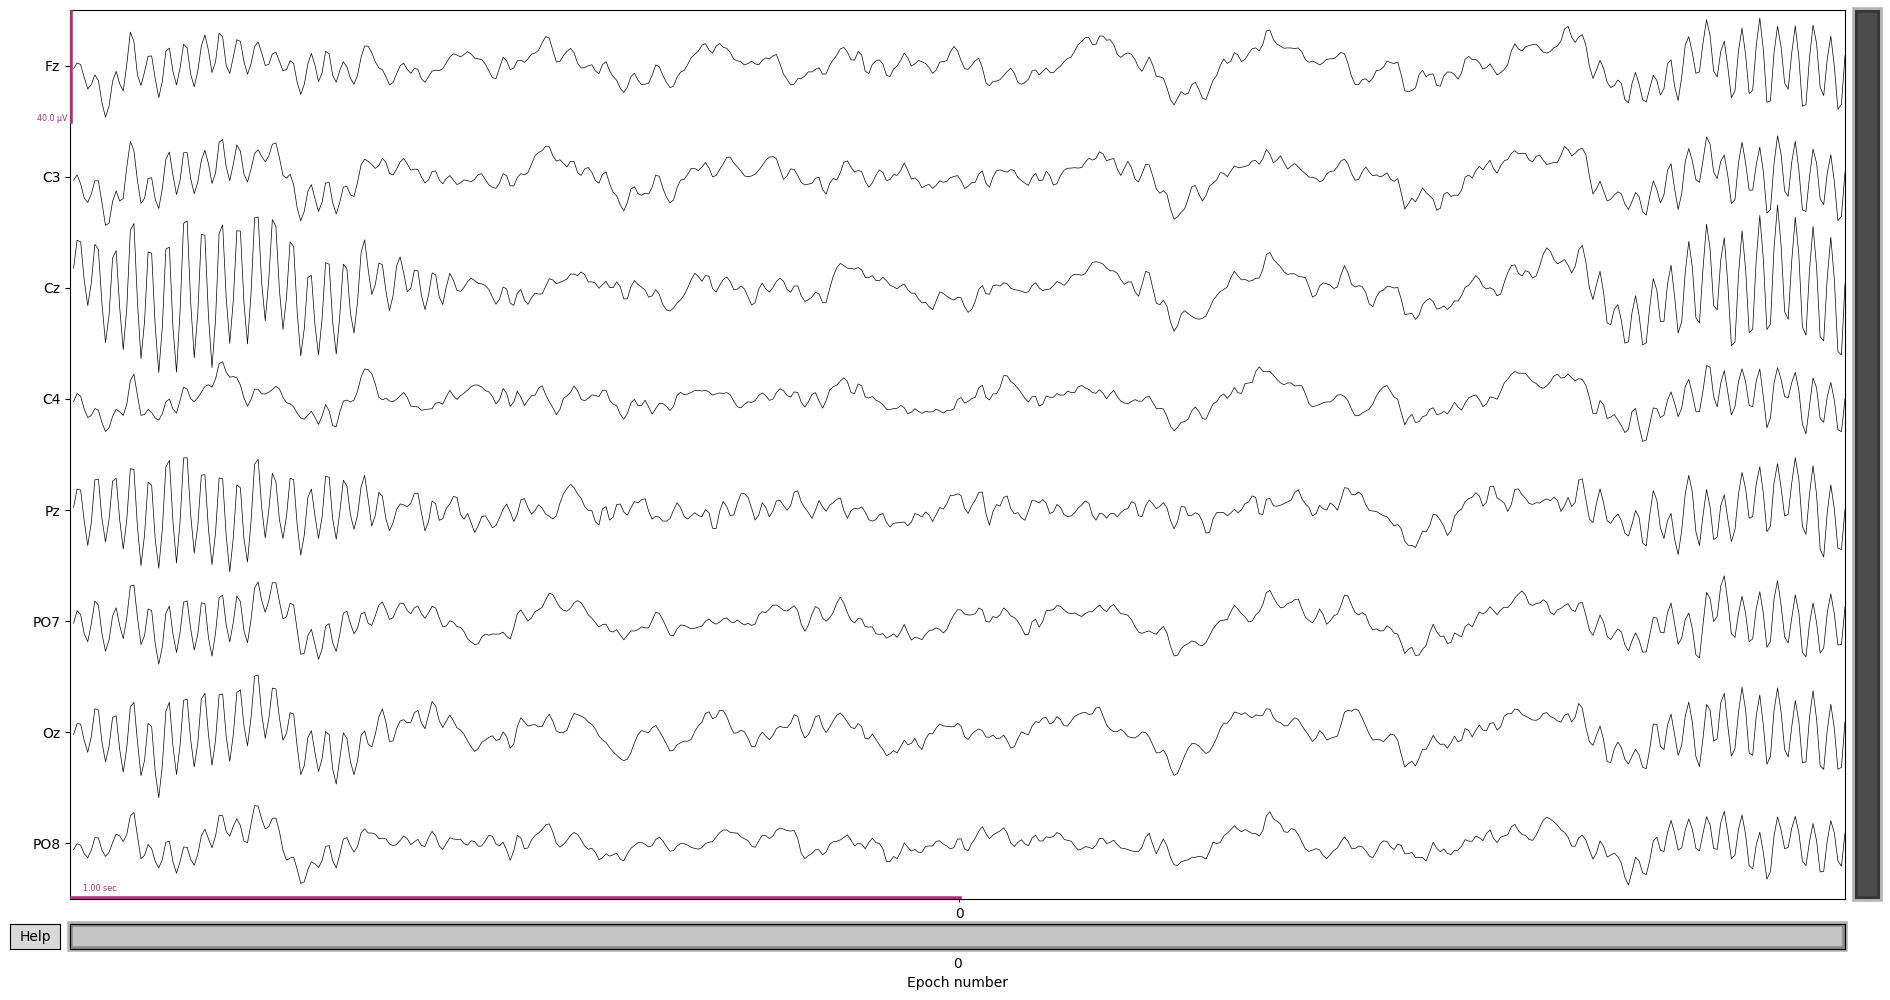

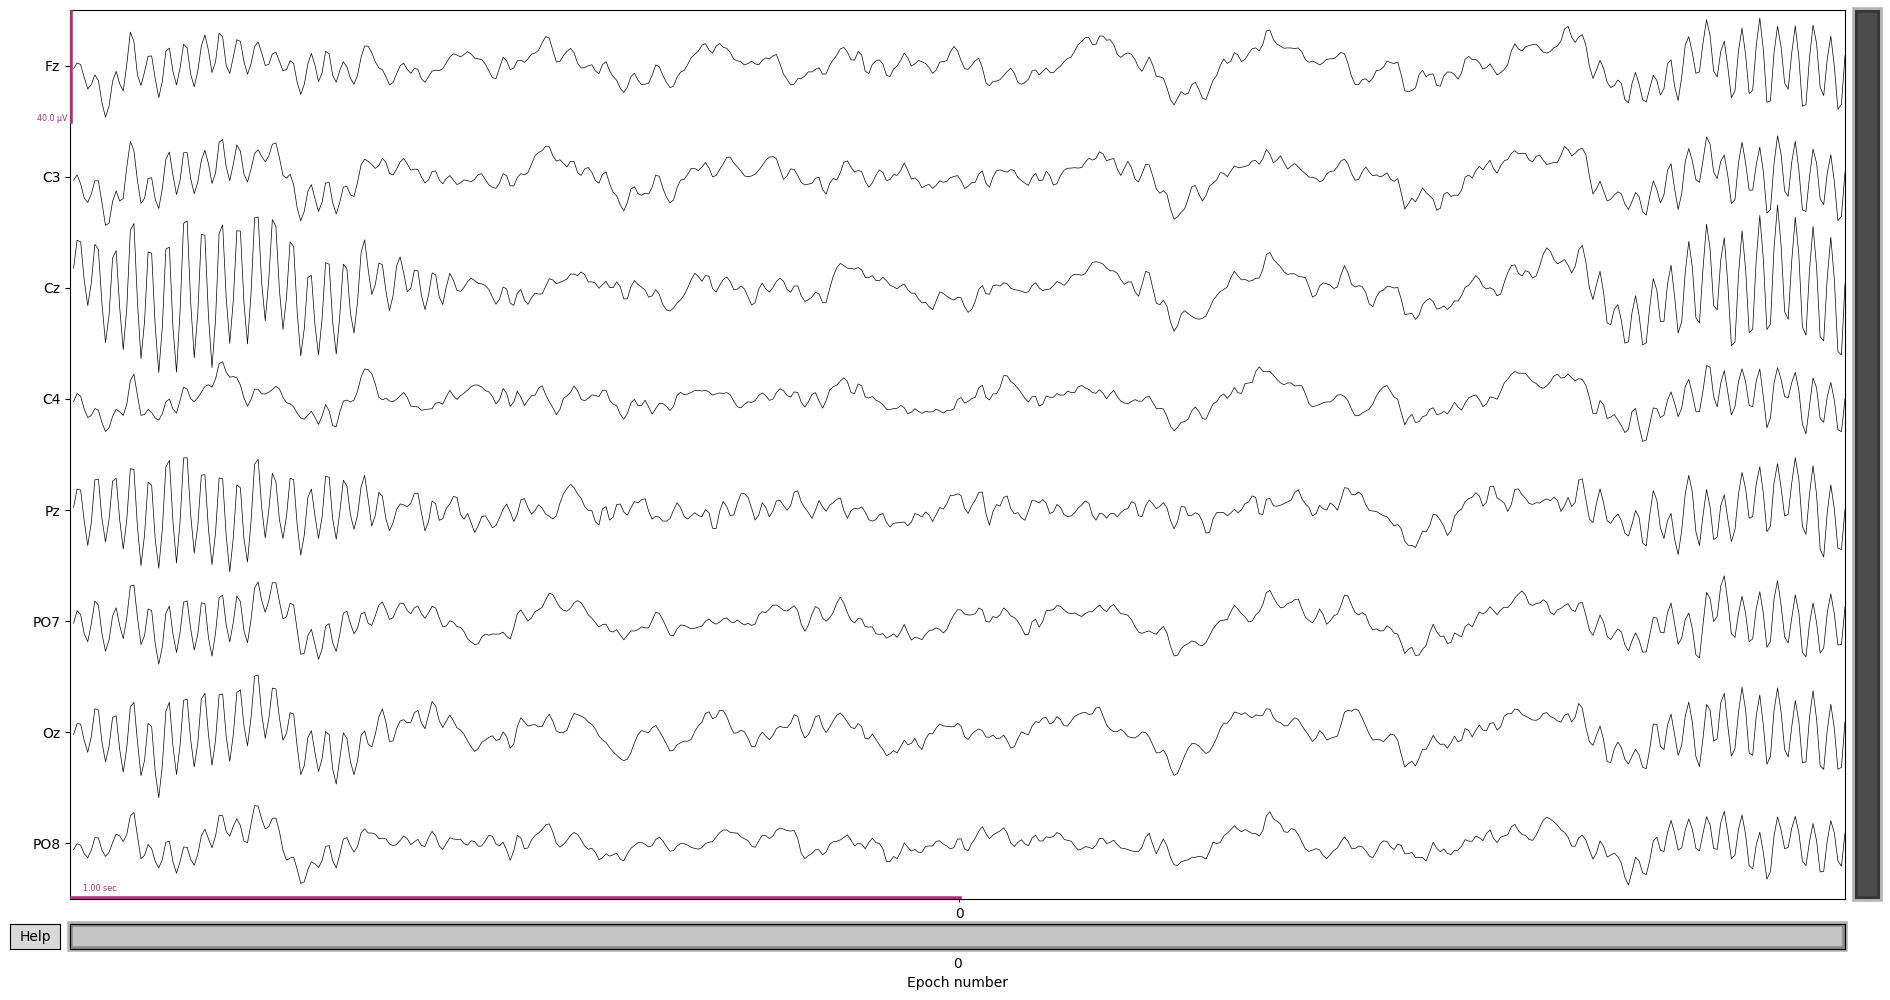

In [ ]:
# fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\105.96824729999935B.fif"
# fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\30.55084010000064C.fif"
# fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\75.88466029999836U.fif"
fname = r"C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\87.2017207000008A.fif"
raw = mne.io.read_raw_fif(fname, preload = True)
raw.notch_filter([50,10], trans_bandwidth = 3)
new_data = raw.get_data()[:,200:-100]
raw_new = mne.io.RawArray(new_data, raw.info)
epoch = mne.Epochs(raw_new, events=[[0,0,1]], tmin=0, tmax=2, baseline=(None,None))
epoch.plot()
# raw.notch_filter(50, notch_widths=10)
# raw.compute_psd().plot()

In [ ]:
data = raw.get_data()[:,:925]
data.shape

(8, 925)

In [ ]:
d = epoch.get_data().squeeze()[:,:925]
d.shape
# d = np.hstack([ np.zeros((8,274)) ,d, np.zeros((8,275)) ])

Using data from preloaded Raw for 1 events and 501 original time points ...


(8, 501)

In [ ]:
def cca_reference(list_freqs, fs, num_smpls, phases: Optional[Union[ndarray, int, float]] = None, num_harms=3):
    num_freqs = len(list_freqs)
    tidx = np.arange(1, num_smpls + 1) / fs  # time index

    y_ref = np.zeros((num_freqs, 2 * num_harms, num_smpls))
    for freq_i in range(num_freqs):
        tmp = []
        for harm_i in range(1, num_harms + 1):
            stim_freq = list_freqs[freq_i]  # in HZ
            stim_phase = phases[freq_i]
            # Sin and Cos
            tmp.extend([np.sin(2 * np.pi *  tidx * harm_i * stim_freq + (np.pi * stim_phase)),
                        np.cos(2 * np.pi * tidx * harm_i * stim_freq + (np.pi * stim_phase))])
        y_ref[freq_i] = tmp  # 2*num_harms because include both sin and cos

    return y_ref

In [ ]:
from sklearn.cross_decomposition import CCA
from filterbank import filterbank
from scipy.stats import mode

def fbcca_realtime(eeg, list_freqs, list_phases, fs, num_harms=3, num_fbs=5, debug=True):
    # print("EEG shape: ", eeg.shape)

    fb_coefs = np.power(np.arange(1, num_fbs + 1), (-1.25)) + 0.25

    num_targs = len(list_freqs)
    # print("HERE IS THE EEG SHAPE", eeg.shape)
    _, num_smpls = eeg.shape  # 40 taget (means 40 fre-phase combination that we want to predict)
    y_ref = cca_reference(list_freqs, fs, num_smpls, list_phases, num_harms)
    cca = CCA(n_components=1)  # initilize CCA

    # result matrix
    r = np.zeros((num_fbs, num_targs))
    results = np.zeros(num_targs)
    r_tmp_mode = []
    r_tmp_corr_avg = []

    
    test_tmp = np.squeeze(eeg[:, :])  # deal with one event a time
    for fb_i in range(num_fbs):  # filter bank number, deal with different filter bank
        for class_i in range(num_targs):
            testdata = filterbank(test_tmp, fs, fb_i)  # data after filtering
            refdata = np.squeeze(y_ref[class_i, :, :])  # pick corresponding freq target reference signal
            test_C, ref_C = cca.fit_transform(testdata.T, refdata.T)
            # len(row) = len(observation), len(column) = variables of each observation
            # number of rows should be the same, so need transpose here
            # output is the highest correlation linear combination of two sets
            r_tmp, _ = pearsonr(np.squeeze(test_C),
                                np.squeeze(ref_C))  # return r and p_value, use np.squeeze to adapt the API
            if r_tmp == np.nan:
                r_tmp = 0
            r[fb_i, class_i] = r_tmp
    rho = np.dot(fb_coefs, r)  # weighted sum of r from all different filter banks' result
    if(debug):
        print("rho: ", rho)
    result = np.argmax(rho) # get maximum from the target as the final predict (get the index), and index indicates the maximum entry(most possible target)
    if(debug):
        print("result: ", result)
    r_tmp_mode.append(result)
    if(debug):
        print("correlation: ", abs(rho[result]))
    r_tmp_corr_avg.append(abs(rho[result]))
    r_mode = mode(r_tmp_mode)[0][0]
    r_corr_avg = np.mean(r_tmp_corr_avg)
    if(debug):
        print("====Most recurrent class: ====", r_mode)
        print("====Average correlation: =====", r_corr_avg)

    THRESHOLD = 0.3
    if r_corr_avg >= THRESHOLD:  # 2.749=np.sum(fb_coefs*0.85)
        return r_mode  # if the correlation isn't big enough, do not return any command

In [ ]:
# FBCCA
list_freqs = FREQS
list_phases = PHASES
TARGET_CHARACTERS:list = ["A", "B", "C", "J", "K", "L", "S", "T", "U"]
fs = 250
num_harms = 5
num_fbs = 5
MARKERS:dict = {"A": 1.0, "B": 2.0, "C": 3.0, "D": 4.0, "E": 5.0, "F": 6.0, "G": 7.0, "H": 8.0, "I": 9.0, "J": 10.0, "K": 11.0, "L": 12.0, "M": 13.0, "N": 14.0, "O": 15.0, "P": 16.0, "Q": 17.0, "R": 18.0, "S": 19.0, "T": 20.0, "U": 21.0, "V": 22.0, "W": 23.0, "X": 24.0, "Y": 25.0, "Z": 26.0, "0": 27.0, "1": 28.0, "2": 29.0, "3": 30.0, "4": 31.0, "5": 32.0, "6": 33.0, "7": 34.0, "8": 35.0, "9": 36.0, ".": 37.0, "?": 38.0, ",": 39.0, "(": 40.0, "Space": 41.0, ")": 42.0, "!": 43.0, "-": 44.0, "<<":45.0, "trial_start":99.0}
# result = fbcca_realtime(data, list_freqs, list_phases, fs, num_harms, num_fbs)
for X,y in zip(X_test, y_test):
    # print(X.shape,y)
    result = fbcca_realtime(X, list_freqs, list_phases, fs, num_harms, num_fbs, debug=False)
    y = list(filter(lambda x: MARKERS[x] == y, MARKERS))[0]
    print(y, TARGET_CHARACTERS[result])
    # break

B J
J J
L K
B B
T A
K J
C J
K K
L L
B A
S S
C J
A A
L J
S J
C B
S J
J J
J J
T J
C C
K K
A B
S C
U B
U U
L A
J C
T C
B B
K K
U B
C C
B K
S A
J J
U U
T T
A A
A A
U J
K K
A A
T T
L L


In [ ]:
from glob import glob
import os

files = glob(r'C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\*')
results = []
for fname in files:
    raw = mne.io.read_raw_fif(fname, preload = True)
    # epoch = mne.Epochs(raw, events=[[0,0,1]], tmin=0, tmax=3.7, baseline=(None,None))
    # epoch.plot()
    data = raw.get_data()[:,:925]
    # data.shape
    result = fbcca_realtime(data, list_freqs, list_phases, fs, num_harms, num_fbs, debug=False)
    path, filename = os.path.split(fname)    
    results.append((filename[-5], TARGET_CHARACTERS[result]))
    print(filename[-5], TARGET_CHARACTERS[result])

Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\102.21916679999958C.fif...
    Range : 0 ... 924 =      0.000 ...     3.696 secs
Ready.
Reading 0 ... 924  =      0.000 ...     3.696 secs...
C C
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\105.96824729999935B.fif...
    Range : 0 ... 925 =      0.000 ...     3.700 secs
Ready.
Reading 0 ... 925  =      0.000 ...     3.700 secs...
B B
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\109.71780880000006K.fif...
    Range : 0 ... 923 =      0.000 ...     3.692 secs
Ready.
Reading 0 ... 923  =      0.000 ...     3.692 secs...
K K
Opening raw data file C:\Users\bci\Documents\projects\hybrid-ssvep-p300-speller\simple_ssvep_v2\record\sunsun_20230319_online\113.46800600000097J.fif...
    Range : 0 ... 927 =      0.

In [ ]:
list_freqs = FREQS
list_phases = PHASES
TARGET_CHARACTERS:list = ["A", "B", "C", "J", "K", "L", "S", "T", "U"]
fs = 250
num_harms = 5
num_fbs = 5

# result = fbcca_realtime(data, list_freqs, list_phases, fs, num_harms, num_fbs)
result = fbcca_realtime(d, list_freqs, list_phases, fs, num_harms, num_fbs)
print(TARGET_CHARACTERS[result])
# ["A", "B", "C", "J", "K", "L", "S", "T", "U"]
# [8,    8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6]
# [0 , 0.35 , 0.70 , 1.05 , 1.40 , 1.75, 0.10, 0.45, 0.80 ]

rho:  [1.38588552 1.41696134 1.2857903  1.4351951  1.29546279 1.28190969
 1.0386475  0.75346057 1.13218615]
result:  3
correlation:  1.4351950952926924
====Most recurrent class: ==== 3
====Average correlation: ===== 1.4351950952926924
J


In [ ]:
preds,_ = model.predict(d[:,:-1])
print(list(filter(lambda x: MARKERS[x] == preds[0], MARKERS))[0])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 4)